# Capstone2 Data Wrangling for Mental Health Dataset

## Table of Contents
1. [Objective and Problem Statement](#1.-Objective-and-Problem-Statement)
2. [The Dataset](#2.-The-Dataset)
3. [Import Libraries](#3.-Import-Libraries)
4. [Load Data](#4.-Load-Data)
5. [Data Exploration](#5.-Data-Exploration)
    - [Shape and Structure](#Shape-and-Structure)
    - [Summary Statistics](#Summary-Statistics)
    - [Identify Categorical Features](#Identify-Categorical-Features)
    - [Check for Missing Values](#Check-for-Missing-Values)
    - [Check for duplicates](#Check-for-duplicates)
    - ['Country' Groups](#'Country'-Groups)
    - ['Occupation'](#'Occupation')
6. [Data Cleaning](#6.-Data-Cleaning)
   - [Correcting Data Types](#Correcting-Data-Types)
7. [Data Transformation](#7.-Data-Transformation)
    - [Labeling Binary Variables](#Labeling-Binary-Variables)
8. [Dataset Review](#8.-Dataset-Review)
9. [Save Cleaned Data](#9.-Save-Cleaned-Data)
10. [Summary](#10.-Summary)


### 1. Objective and Problem Statement

The rising demand for mental health services is growing, but resources are unevenly distributed. One significant challenge is the lack of insight into who is most likely to seek mental health support. As a result, care may be delayed or inefficiently allocated, and patients may not receive timely support. **This project seeks to address this challenge by developing a predictive model to identify individuals most likely to seek mental health services**, enabling targeted outreach and resource allocation.

The objective of this data wrangling process is to clean and organize the dataset while retaining all available data, ensuring its integrity for exploratory data analysis (EDA). This involves identifying missing values, duplicates, and data types. The focus is on preparing the data for deeper analysis, including potential comparisons across countries and globally.


### 2. The Dataset

The dataset was taken from kaggle: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset<br>
Additional references can be found here: https://ourworldindata.org/mental-health

Downloaded as zip file. Size: **2MB**<br>
Dataset file size (unzipped): **31.1MB**<br>

**Dataset Size:**<br> 
 - Rows: **~300K**<br>
 - Columns: **17**<br>

**Features:**<br>
- <i>Timestamp</i> - The time survey was submitted.
- <i>Gender</i> - Male, Female
- <i>Country</i> - Respondent's country.
- <i>Occupation</i> - Respondent profession.
- <i>self_employed</i> - True, False
- <i>family_history</i> - History of family diagnosed with mental health issues.
- <i>treatment</i> - True, False
- <i>Days_Indoors</i> - Number of days the respondent stays indoors
- <i>Growing_Stress</i> - True, False
- <i>Changes_Habits</i> - Yes, Maybe
- <i>Mental_Health_History</i> - No, Maybe
- <i>Mood_Swings</i> - Medium, Low
- <i>Coping_Struggles</i> - True, False
- <i>Work_Interest</i> - No, Maybe
- <i>Social_Weakness</i> - No, Maybe
- <i>mental_health_interview</i> - No, Maybe
- <i>care_options</i> - No, Yes

**Target Variable:**<br>
- <i>treatment</i>


### 3. Import Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

### 4. Load Data

In [3]:
# Load data set from csv 'MentalHealthDataSet.csv' using pandas csv reader, loader

df = pd.read_csv('../data/MentalHealthDataSet.csv')
# Show partial rows
df.head() 


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 5. Data Exploration

#### Shape and Structure


In [4]:
# Inspect columns and row size

print(f'Data shape: {df.shape}\n')
# Show column information
df.info()

Data shape: (292364, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object

All column dtypes are string objects.<br>

Further exploration is required for the features **care_options**, **work_interest**, **Social_weakness**. We need to understand the purpose of these features.


#### Summary Statistics

In [5]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


#### Identify Categorical Features

In [6]:
# Identify categorical features
categorical_cols = df.drop(columns=['Timestamp', 'Country', 'Gender']).select_dtypes(exclude='datetime').columns

# Inspect value counts of the categorical features
for col in categorical_cols:
    print(f'Feature: {df[col].value_counts().index.name}, type: {df[col].value_counts().dtype}')

Feature: Occupation, type: int64
Feature: self_employed, type: int64
Feature: family_history, type: int64
Feature: treatment, type: int64
Feature: Days_Indoors, type: int64
Feature: Growing_Stress, type: int64
Feature: Changes_Habits, type: int64
Feature: Mental_Health_History, type: int64
Feature: Mood_Swings, type: int64
Feature: Coping_Struggles, type: int64
Feature: Work_Interest, type: int64
Feature: Social_Weakness, type: int64
Feature: mental_health_interview, type: int64
Feature: care_options, type: int64


The feature dtypes are all in int64 - a categorical type. 

We need to decide how to encode each feature numerically. 

This we will explore and analyze in EDA.


#### Check for Missing Values

In [7]:
# Check missing or null values

print(df.isnull().sum())
print(df.self_employed.isnull().sum())
print(f'\nPercent Missing: {(100*df.self_employed.isnull().sum()/len(df)):.3f}')

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64
5202

Percent Missing: 1.779


**self_employed** column has null values, accounting for 1.8 percent of the total respondents.

There are various techniques that can be applied to missing values. 

1. Mode - Replace missing values by the mode of non-missing values.
2. Group wise imputation - Apply statistic of a group of dependent features.
3. kNN Imputer - Get the mean of the nearest k neighbors.

We shall explore this further in EDA.

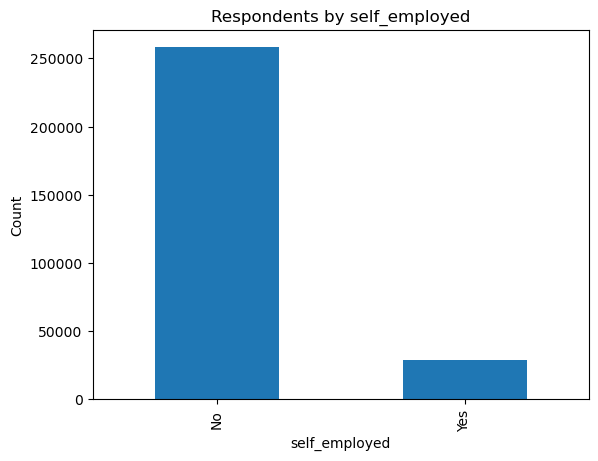

In [8]:
country_counts = df['self_employed'].value_counts()
country_counts.plot(kind='bar')
plt.xlabel('self_employed')
plt.ylabel('Count')
plt.title('Respondents by self_employed')
_ = plt.show()

The feature 'self_employed' also is highly imbalanced with >250K answering 'No', and 'Yes' at <50K.

#### Check for duplicates

In [9]:
# Remove duplicates using df.drop_duplicates and save the returned cleaned dataframe.

duplicated = df.duplicated()
if duplicated.sum() > 0:
    print(f'There are {duplicated.sum()} duplicated rows.')
else:
    print('No duplication found')


There are 2313 duplicated rows.


In [10]:
# Find duplicated rows including original and duplicates
# Create a subset of all duplicated rows
duplicates = df[df.duplicated(keep=False)]
# Sort by all columns to stack duplicates under originals
stacked_duplicates = duplicates.sort_values(by=list(df.columns)).reset_index(drop=True)

# Show the duplicates stacked alongside the original rows"
stacked_duplicates

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,10/2/2014 21:25,Female,United States,Corporate,No,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Not sure
1,10/2/2014 21:25,Female,United States,Corporate,No,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Not sure
2,10/2/2014 21:25,Female,United States,Others,No,Yes,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Not sure
3,10/2/2014 21:25,Female,United States,Others,No,Yes,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Not sure
4,10/2/2014 21:25,Female,United States,Student,No,Yes,Yes,More than 2 months,Yes,Maybe,Maybe,High,No,Maybe,No,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,9/8/2014 21:30,Female,United States,Corporate,No,No,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Yes
4622,9/8/2014 21:30,Female,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Yes
4623,9/8/2014 21:30,Female,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Yes
4624,9/8/2014 21:30,Female,United States,Student,No,No,Yes,More than 2 months,Yes,Maybe,Maybe,High,No,Maybe,No,No,Yes


From the sorted output above, with the original and its duplicate displayed side by side, the total count of the duplicated entries is twice the count of duplicates. 

This indicates each identified row has exactly one duplicate. 

The timestamp, including all the other column values are the same for each duplicated row. 

What is the probability of 2 respondents from the same country submitting the survey at the same time and entering the same answer for each question?

We will review this finding later in the EDA.

#### 'Country' Groups

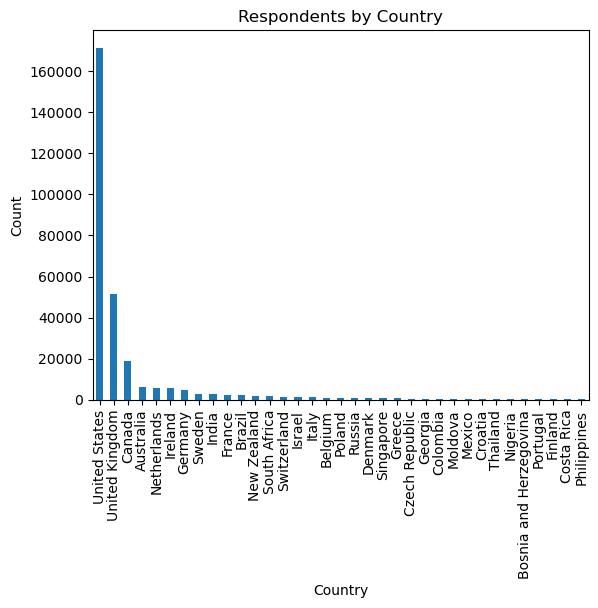

In [11]:
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Respondents by Country')
_ = plt.show()

'Country' shows a high imbalance with the US having more than 50% respondents than the country with second-highest number of respondents.

#### 'Occupation'

In [12]:
df['Occupation'].unique()

array(['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
      dtype=object)

For the feature 'Occupation' with a limited number of distinct values, ***one-hot*** encoding is the preferred method. It retains the categorical nature of the data without having to worry about class order.

### 6. Data Cleaning


#### Correcting Data Types

In [13]:
# Update timestamp to datetime - suitable for pandas operations.

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:00,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:00,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 7. Data Transformation

#### Labeling Binary Variables

In [14]:
# Gender - Replace Male = 0, Female = 1

bin_map = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(pd.Series(bin_map))
print(f'Gender: {df['Gender'].unique()}')


Gender: [1 0]


In [15]:
# Replace Yes, No with int 1, 0 for the following columns

bin_cols = [
    'self_employed',
    'family_history',
    'treatment',
    'Coping_Struggles'
]
bin_map = {
    'No': 0,
    'Yes': 1
}
for col in bin_cols:
    df[col] = df[col].map(pd.Series(bin_map))
    
df[bin_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   self_employed     287162 non-null  float64
 1   family_history    292364 non-null  int64  
 2   treatment         292364 non-null  int64  
 3   Coping_Struggles  292364 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 8.9 MB


In [16]:
# Review our changes
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,1,United States,Corporate,NaN,0,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Not sure
1,2014-08-27 11:31:00,1,United States,Corporate,NaN,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,No
2,2014-08-27 11:32:00,1,United States,Corporate,NaN,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes
3,2014-08-27 11:37:00,1,United States,Corporate,0.0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,1,United States,Corporate,0.0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes


In [17]:
# Show dtypes
df.dtypes

Timestamp                  datetime64[ns]
Gender                              int64
Country                            object
Occupation                         object
self_employed                     float64
family_history                      int64
treatment                           int64
Days_Indoors                       object
Growing_Stress                     object
Changes_Habits                     object
Mental_Health_History              object
Mood_Swings                        object
Coping_Struggles                    int64
Work_Interest                      object
Social_Weakness                    object
mental_health_interview            object
care_options                       object
dtype: object

### 8. Dataset Review

In [18]:
profile = ProfileReport(df, title="Mental Health Profiling Report")

profile.to_widgets()
profile.to_file("./mental_health.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

To view the report, open the recently created html file ***mental_health.html*** in a browser.

### 9. Save Cleaned Data

In [20]:
# Save cleaned dataset to file 'MentalHealthCleaned.csv'
df.to_csv('../data/MentalHealthCleaned.csv', index=False)  # Replace with your output path

### 10. Summary

**Key Steps and Findings:**

- **Timestamp**: Timestamp column values are converted to Pandas datetime.

- **Categorical Features**: Except for 'Timestamp, all other features are found to be categorical.
    - Further analysis will be required once we get to the EDA step.

- **Handling Categorical Features**:
    - **Binary Features**: Two-class features ('Yes' or 'No') were binary encoded with 'Yes' as 1 and 'No' as 0 for easier numeric processing.
  
- **Datetime Conversion**: The 'Timestamp' column was reformatted to a datetime type for easier manipulation in future analyses.

- **High Imbalance**:
    - **Country**: Country is highly imbalanced at >50%.
    - **self_employed**: Imbalanced at >50%.

- **Missing Values**: The feature 'self_employed' has 5202 rows with missing values.

- **Duplicate Rows**: The mental health dataset has 2313 duplicate rows.

